In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import brier_score_loss
from unified_functions import *

pd.set_option('display.max_columns', None)

b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\dalex\_global_checks.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Example

In [3]:
df = pd.read_csv('../materials/processed_df_new.csv')
df.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
1,ID00008,64.0,5.39,0.179667,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,1.0,0.0,0.0,3.0
2,ID00500,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
3,ID00001,56.0,6.80,0.200000,34.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,2.0
4,ID00002,59.0,40.00,2.222222,18.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,18.0,1,2.0,5.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,0.0,1.0,0.0,2.0


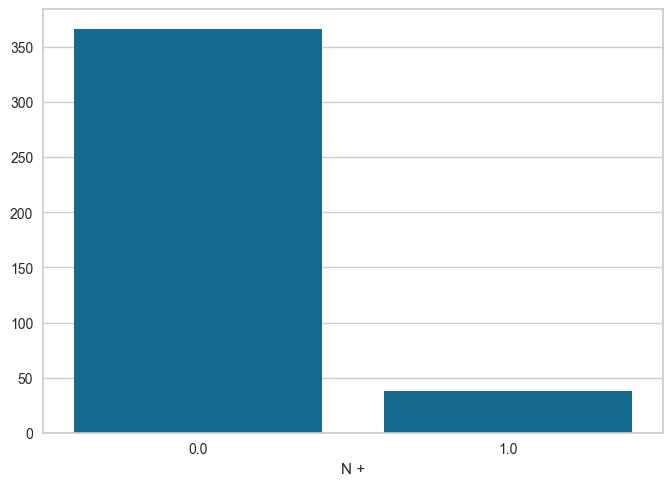

In [4]:
sns.barplot(x=df['N +'].value_counts().index, y=df['N +'].value_counts().values)
plt.xlabel('N +')
plt.show()

In [5]:
numerical_cols = ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI SIZE']
categorical_cols = ['MRI Pirads', 'MRI EPE', 'MRI EPE L', 'MRI EPE P', 'MRI SVI', 'MRI SVI L', 'MRI SVI P', 'Bx ISUP Grade P', 'Bx ISUP Grade L', 'Bx ISUP Grade']

X = df[numerical_cols + categorical_cols]
y = df['N +']

Training model with default hyperparameters...

Fold 0:
ROC AUC score: 0.7567567567567567

Fold 1:
ROC AUC score: 0.910958904109589

Fold 2:
ROC AUC score: 0.928082191780822

Fold 3:
ROC AUC score: 0.922945205479452

Fold 4:
ROC AUC score: 0.7886497064579256

Total scores:
ROC AUC score: 0.8650417026171988



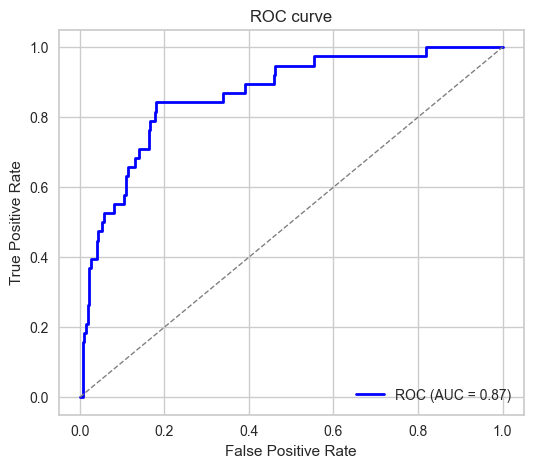

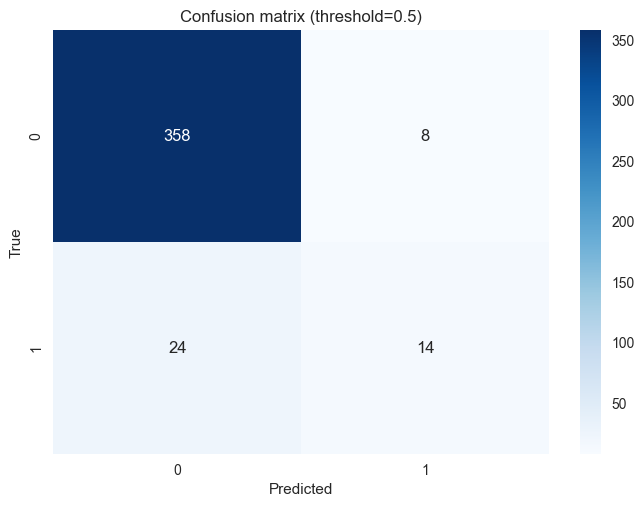

Sensitivity: 0.3684
Specificity: 0.9781
Accuracy: 0.9208%
Preparation of a new explainer is initiated

  -> data              : 404 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002099FCBA700> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 4.99e-05, mean = 0.0863, max = 0.989
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.989, mean = 0.0078, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



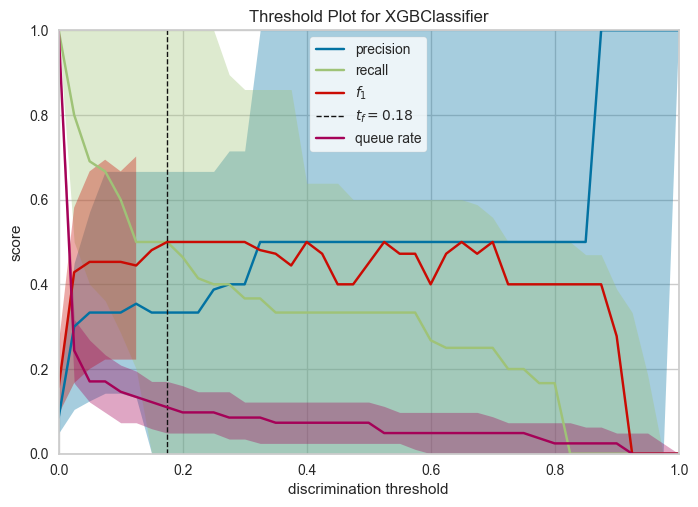

Brier score: 0.0702


In [6]:
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

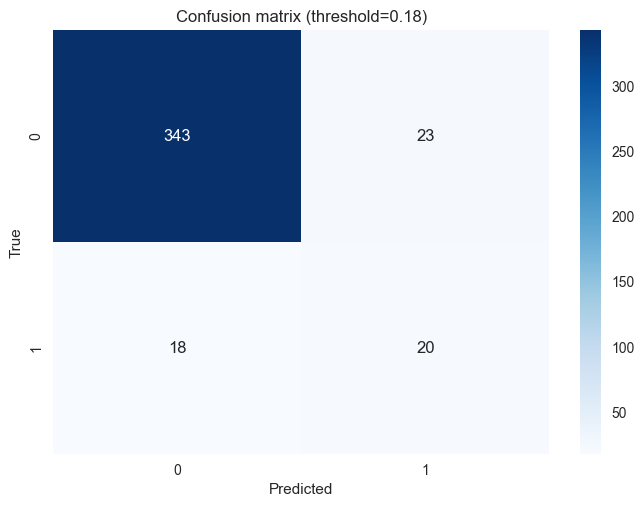

Sensitivity: 0.5263
Specificity: 0.9372
Accuracy: 0.8985%


In [7]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.18)


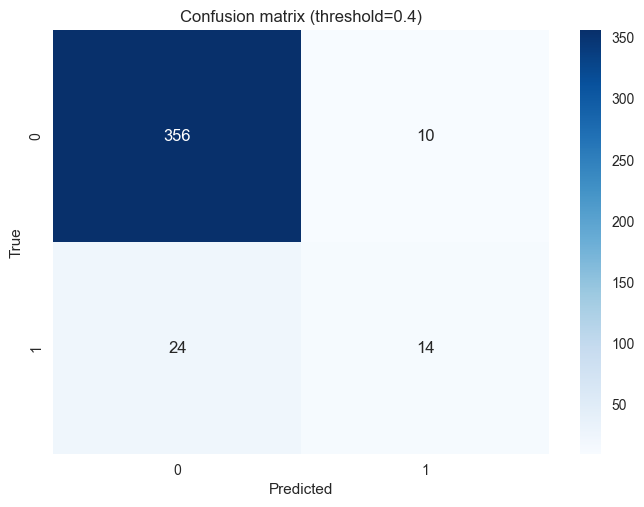

Sensitivity: 0.3684
Specificity: 0.9727
Accuracy: 0.9158%


In [8]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.4)

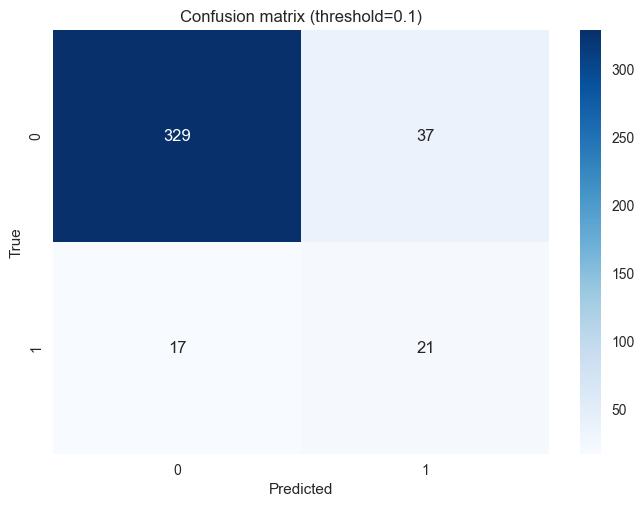

Sensitivity: 0.5526
Specificity: 0.8989
Accuracy: 0.8663%


In [9]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

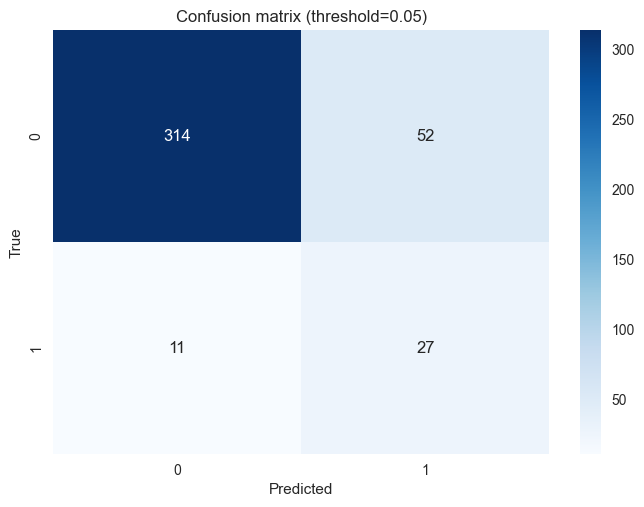

Sensitivity: 0.7105
Specificity: 0.8579
Accuracy: 0.8441%


In [10]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.05)

# Test SMOTE oversampling

Training model with default hyperparameters...

Fold 0: ROC AUC = 0.7490
Fold 1: ROC AUC = 0.7740
Fold 2: ROC AUC = 0.9332
Fold 3: ROC AUC = 0.8134
Fold 4: ROC AUC = 0.8376

Overall ROC AUC across folds: 0.8213


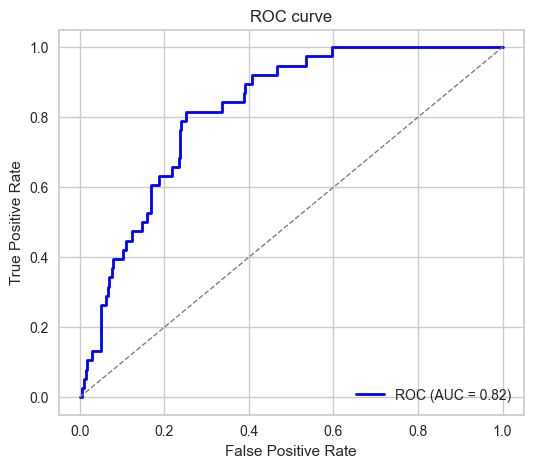

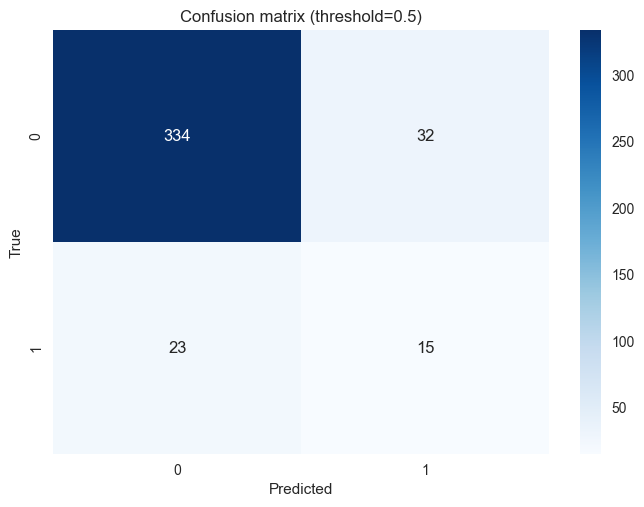

Sensitivity: 0.3947
Specificity: 0.9126
Accuracy: 0.8639%


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



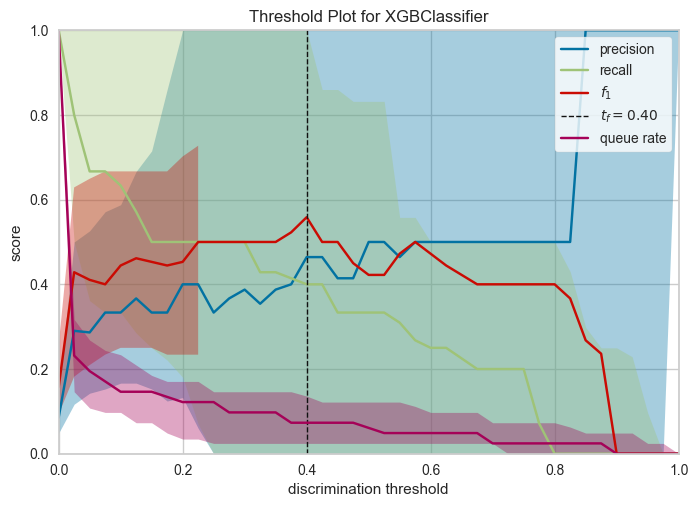

Brier score: 0.1107


In [11]:
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_weights = train_and_evaluate_model_with_smote(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
# plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

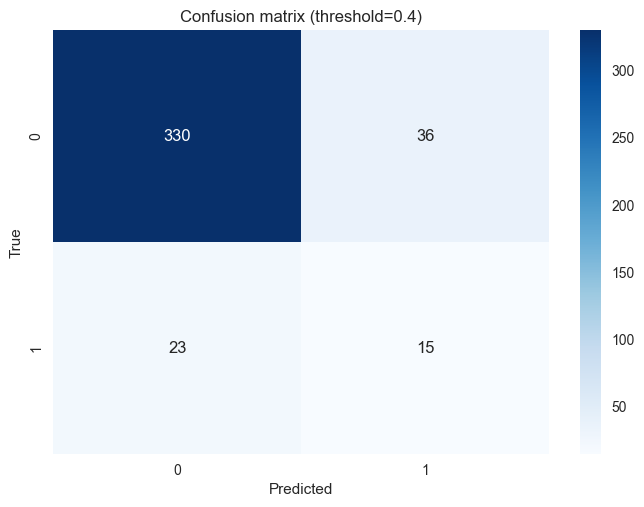

Sensitivity: 0.3947
Specificity: 0.9016
Accuracy: 0.8540%


In [12]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.4)

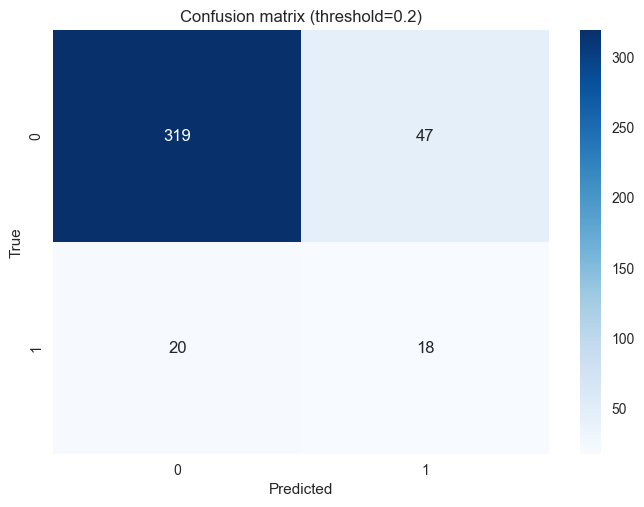

Sensitivity: 0.4737
Specificity: 0.8716
Accuracy: 0.8342%


In [13]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.2)

# Optimizing XGBoost

### Maximize AUC

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

# param_grid = {
#     'classifier__learning_rate': [0.05, 0.1, 0.2],
#     'classifier__n_estimators': [200, 400, 800],
#     'classifier__max_depth': [3, 6, 9],
#     'classifier__subsample': [0.8, 0.9, 1.0],
#     'classifier__colsample_bytree': [0.8, 0.9, 1.0],
#     'classifier__gamma': [0, 0.1, 0.2]
# }

Best hyperparameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}


Tuning hyperparameters...

Best hyperparameters: {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best roc_auc score: 0.8727049582719686

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0.2, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs':

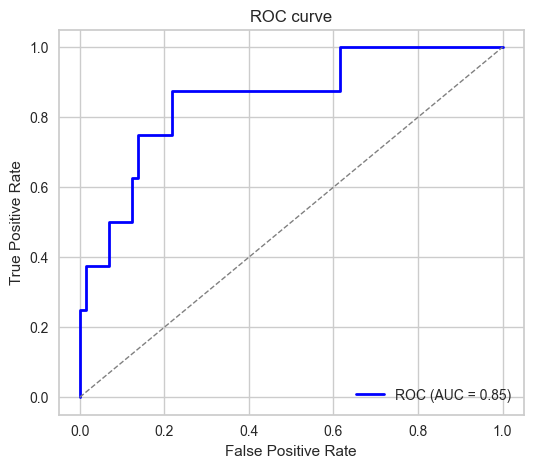

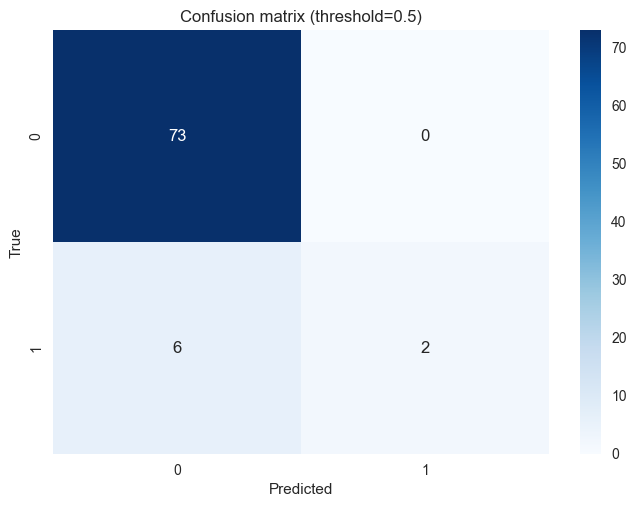

Sensitivity: 0.2500
Specificity: 1.0000
Accuracy: 0.9259%
Preparation of a new explainer is initiated

  -> data              : 404 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002099FCBA700> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0202, mean = 0.0873, max = 0.601
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.507, mean = 0.00676, max = 0.967
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



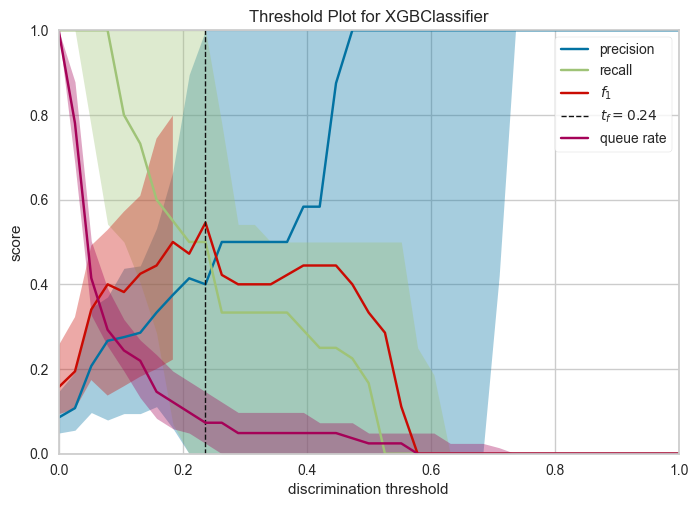

Brier score: 0.0670


In [14]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='roc_auc', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")


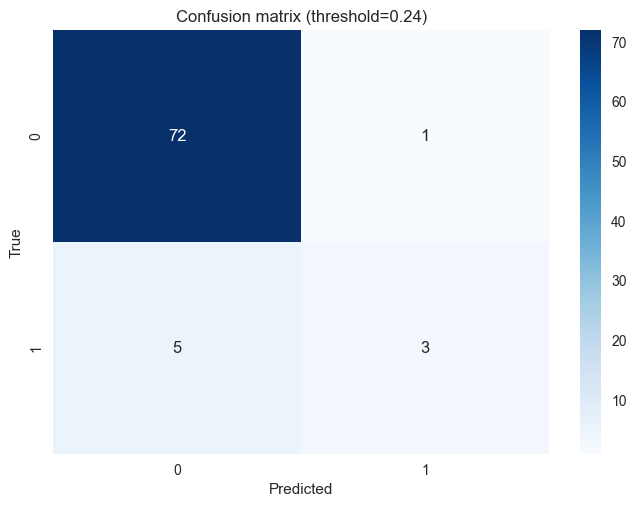

Sensitivity: 0.3750
Specificity: 0.9863
Accuracy: 0.9259%


In [15]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.24)

### Maximize brier score

Tuning hyperparameters...

Best hyperparameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best neg_brier_score score: -0.06659688961658158

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_

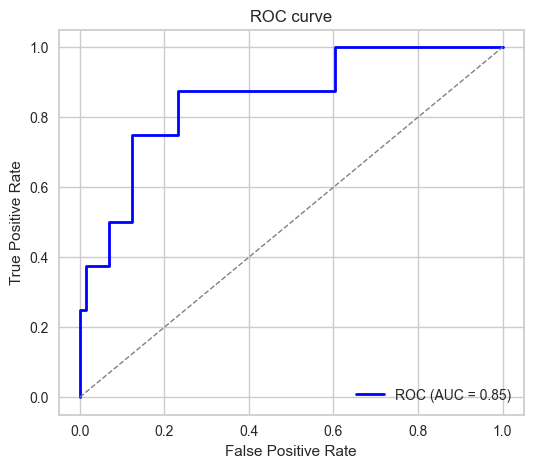

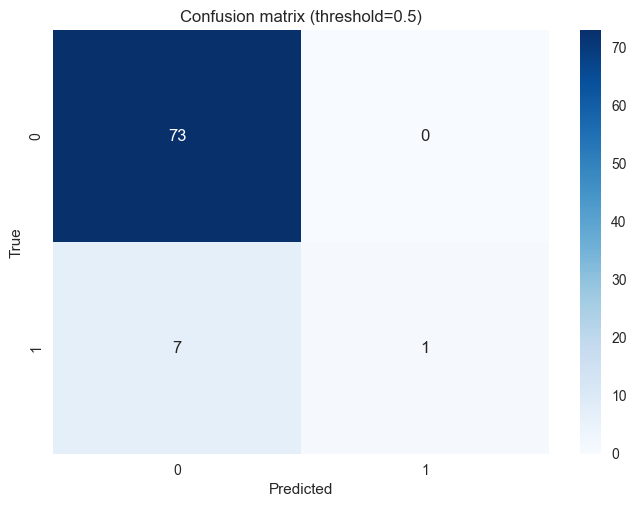

Sensitivity: 0.1250
Specificity: 1.0000
Accuracy: 0.9136%
Preparation of a new explainer is initiated

  -> data              : 404 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002099FCBA700> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0197, mean = 0.0868, max = 0.635
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.484, mean = 0.00727, max = 0.967
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



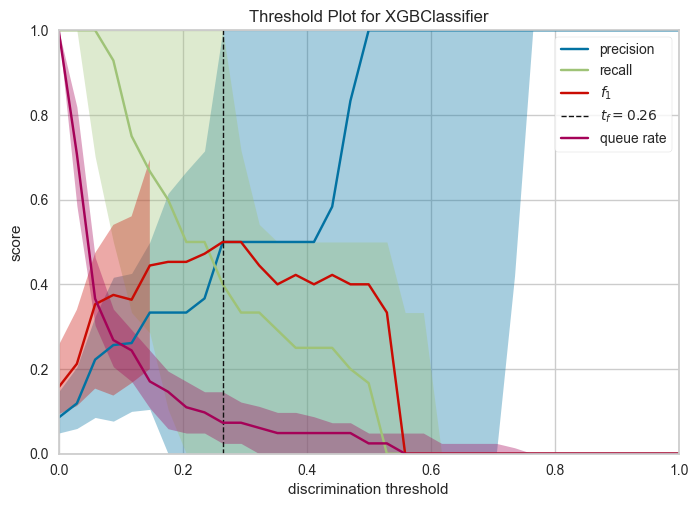

Brier score: 0.0669


In [19]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

# Optimize XGBoost with SMOTE

Tuning hyperparameters with SMOTE on training set only...

Best hyperparameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
Best neg_brier_score score: -0.05314991696093708

Best params after tuning:
{'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}

ROC AUC on test set: 0.8305


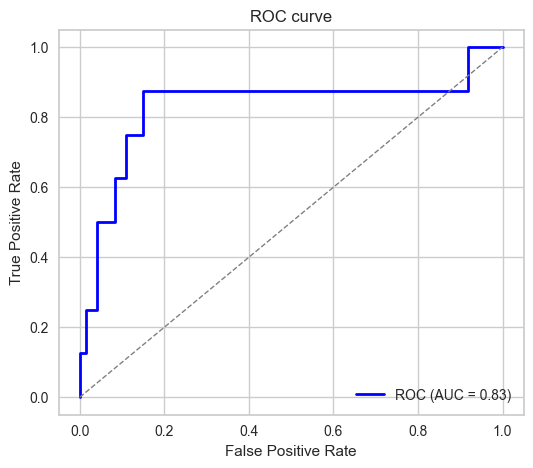

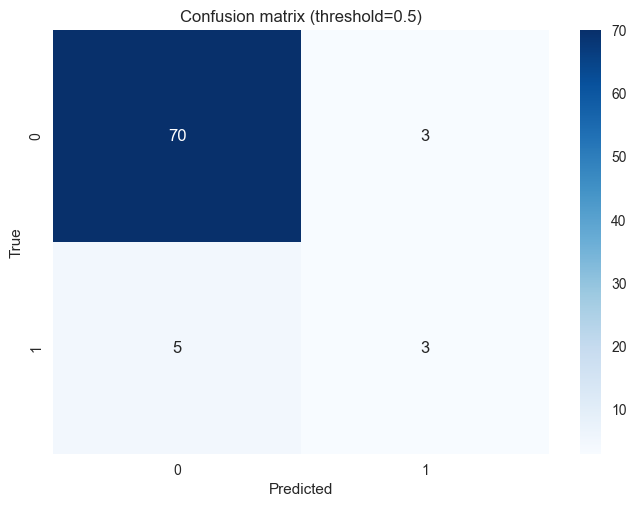

Sensitivity: 0.3750
Specificity: 0.9589
Accuracy: 0.9012%


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



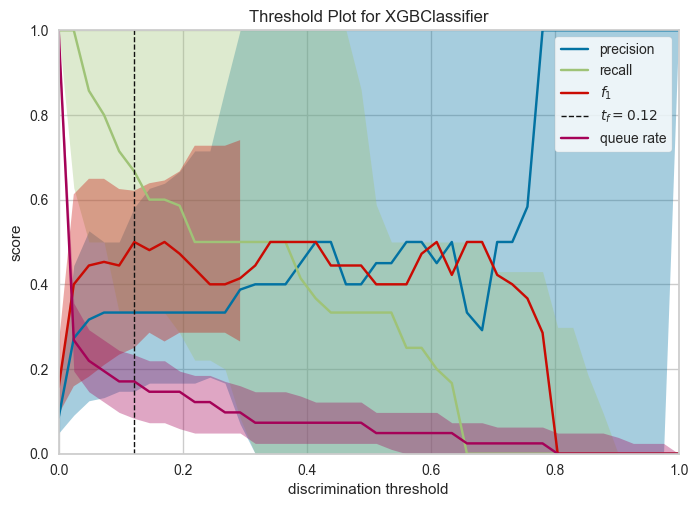

Brier score: 0.0697


In [21]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model_with_smote(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
# plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")